In [1]:
from functions import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st


In [2]:
# league_id = '366970'
league_id = '330268' #shut the fa cup
# league_id = '372953' # Luno
# league_id = '565756'  #OQLIS
data_dict = create_league_dict(league_id)

In [3]:
df = pd.DataFrame(data_dict)

In [4]:
def condition(x, best): return x == best

In [5]:
#most points in a game week
points_history = df.iloc[0, :]

max_gw_pts = -1
for i in points_history.index:
    player_pts = int(max(points_history[i]))
    if player_pts > max_gw_pts:
        max_gw_pts = player_pts
        player_a = i
        gw = [idx for idx, element in enumerate(points_history[i]) if condition(element,player_pts)]
        gw_formatted_points = [x+1 for x in gw][-1]

print(max_gw_pts)
print(player_a)
print(gw_formatted_points)

94
Jesse Pillay
2


In [6]:
#most hits this season

hits_history = df.iloc[5, :]

max_hits = -1
for i in hits_history.index:
    player_hits = int(sum(hits_history[i]))/4
    
    if player_hits > max_hits:
        max_hits = player_hits
        player_b = i
        points_lost_to_hits = max_hits*4

print(max_hits)
print(player_b)
print(points_lost_to_hits)

1.0
Anthony Kieser
4.0


In [7]:
#highest rank for a single gameweek

gw_history = df.iloc[2, :]

best_gw_rank = 10000000000000
for i in gw_history.index:
    player_gw_rank = int(min(gw_history[i]))
    if player_gw_rank < best_gw_rank:
        best_gw_rank = player_gw_rank
        player_c = i
        gw = [idx for idx, element in enumerate(gw_history[i]) if condition(element,best_gw_rank)]
        gw_formatted = [x+1 for x in gw][-1]

print(best_gw_rank)
print(player_c)
print(gw_formatted)

47889
Jesse Pillay
2


In [8]:
#highest overall rank at any point

ovr_history = df.iloc[3, :]

best_ovr_rank = 10000000000000
for i in ovr_history.index:
    player_ovr_rank = int(min(ovr_history[i]))
    if player_ovr_rank < best_ovr_rank:
        best_ovr_rank = player_ovr_rank
        player_d = i
        ovr = [idx for idx, element in enumerate(ovr_history[i]) if condition(element,best_ovr_rank)]
        ovr_formatted = [x+1 for x in ovr][-1]

print(best_ovr_rank)
print(player_d)
print(ovr_formatted)

69398
Jesse Pillay
2


In [9]:
# least transfers made this season

transfer_history = df.iloc[4,:]

least_transfers = 10000
players = []

for i in transfer_history.index:
    total_transfers = sum(transfer_history[i])

    if total_transfers <= least_transfers:
        least_transfers = total_transfers
        players.append(i) 


print(least_transfers)
print(players)


0
['Jesse Pillay', 'Niklas Wietzorrek', 'Nicholas Von Der Becke', 'Liam Smorfitt', 'Jason Perry', 'Armand Otto', 'Marco Gouveia', 'Cole Floyd', 'Daniel De Castro', 'Devon Hodgson', 'Ilan Segal', 'Julian Sathee', 'Sergio Da Silva', 'Jonno Frame']


In [10]:
# most points accumulated on the bench

bench_history = df.iloc[6, :]

bench_total = -1
for i in bench_history.index:
    bench_pts = int(sum(bench_history[i]))
    
    if bench_pts > bench_total:
        bench_total = bench_pts
        player_e = i


print(bench_total)
print(player_e)

36
Devon Hodgson


In [11]:
# most points accumulated on the bench in a single gw

bench_history_gw = df.iloc[6, :]


bench_single_gw = -1
for i in bench_history_gw.index:

    bench_pts = int(max(bench_history_gw[i]))

    if bench_pts > bench_single_gw:
        bench_single_gw = bench_pts
        player_f = i
        best_bp_week = [idx for idx, element in enumerate(bench_history_gw[i]) if condition(element,bench_single_gw)]
        best_bp_week_formatted = [x+1 for x in best_bp_week][-1]


print(bench_single_gw)
print(player_f)
print(best_bp_week_formatted)

21
Devon Hodgson
1


In [12]:
#most consistent manager
points_history = df.iloc[0, :]

best_std = 10000
for i in points_history.index:
    data = points_history[i]
    # interval = st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 
    # print(interval)
    std = np.std(points_history[i])
    if std < best_std:
        best_std = std
        player_g = i
        avg_1 = np.mean(points_history[i])


print(best_std)
print(player_g)
print(avg_1)

0.0
Sergio Da Silva
70.0


In [13]:
# #define sample data
# data = [12, 12, 13, 13, 15, 16, 17, 22, 23, 25, 26, 27, 28, 28, 29]

# #create 95% confidence interval for population mean weight
# st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 

# (16.758, 24.042)

In [14]:
#least consistent manager 
worst_std = 0
for i in points_history.index:
    std = np.std(points_history[i])
    if std > worst_std:
        worst_std = std
        player_h = i
        avg_2 = np.mean(points_history[i])

print(worst_std)
print(player_h)
print(avg_2)

24.0
Nicholas Von Der Becke
68.0


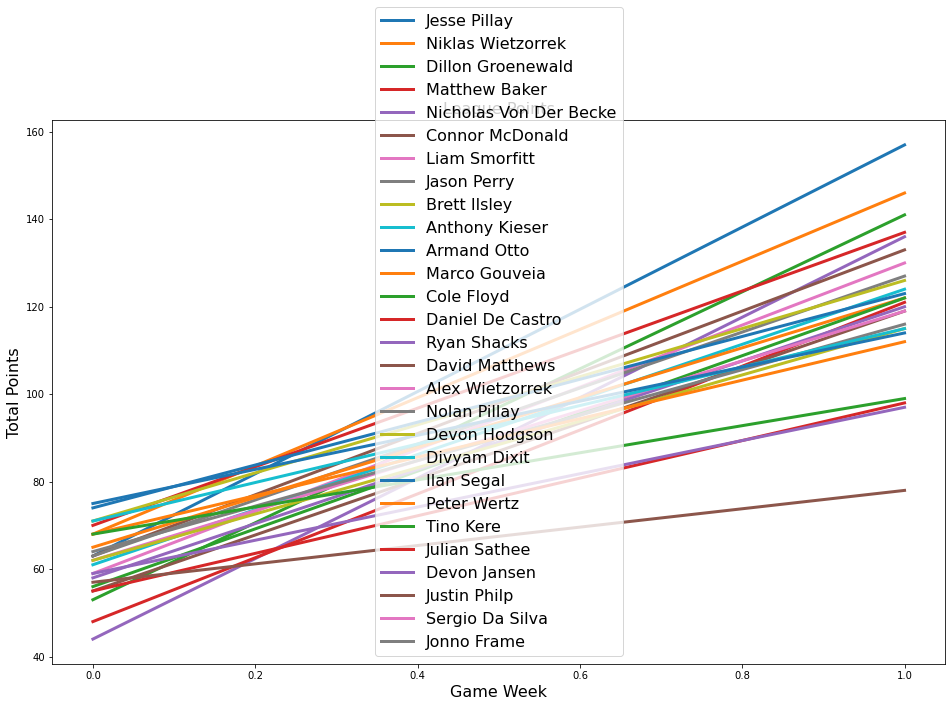

In [15]:
plt.figure(figsize=(16,10))
for i in data_dict:
    plt.plot(data_dict[i]['cumulative_points'], label = i, linewidth = 3)

plt.title('League Points', size = 16)
plt.xlabel('Game Week', size = 16)
plt.ylabel('Total Points', size = 16)
plt.legend(fontsize=16)
plt.savefig('points_worm.png')

In [16]:
full_message = f'''Most points in a single game week: 
{player_a} - {max_gw_pts} points in gameweek {gw_formatted_points}

Most hits taken this season:
{player_b} - {max_hits} hits taken or {points_lost_to_hits} points lost 

Highest rank for a single gameweek: 
{player_c} - ranked {best_gw_rank} in gameweek {gw_formatted}

Highest rank at any point during the season:
{player_d} - ranked {best_ovr_rank} in gameweek {ovr_formatted}

Most points accumulated on bench:
{player_e} - {bench_total} points

Most points on bench for a single gameweek:
{player_f} - {bench_single_gw} points in gameweek {best_bp_week_formatted}

Most consistent manager:
{player_g} with an average of {avg_1} points per week and a standard deviation of {best_std} points

Least Consistent manager: 
{player_h} with an average of {avg_2} points per week and a standard deviation of {worst_std} points
'''

full_message = full_message.replace('.', '\\.').replace('-', '\\-')


lite_message = ''' 

'''

transfer_message = f''' 
Least transfers ({least_transfers}): {players} 
'''

transfer_message = transfer_message.replace('.', '\\.').replace('-', '\\-').replace('(', '\\(').replace(')', '\\)')


In [17]:
telegram_bot_sendtext(full_message, chat_id, 'points_worm.png')

{'ok': True,
 'result': {'message_id': 383,
  'from': {'id': 2119414067,
   'is_bot': True,
   'first_name': 'BotimusPrime',
   'username': 'ConnorMcDonalds_bot'},
  'chat': {'id': 2046052520,
   'first_name': 'Connor',
   'last_name': 'McDonald',
   'type': 'private'},
  'date': 1660672187,
  'photo': [{'file_id': 'AgACAgQAAxkDAAIBf2L72LtiYL-FCGCvG2-lvESFNRifAAIkuTEbEOXgU0jI0pJGr1OMAQADAgADcwADKQQ',
    'file_unique_id': 'AQADJLkxGxDl4FN4',
    'file_size': 875,
    'width': 90,
    'height': 56},
   {'file_id': 'AgACAgQAAxkDAAIBf2L72LtiYL-FCGCvG2-lvESFNRifAAIkuTEbEOXgU0jI0pJGr1OMAQADAgADbQADKQQ',
    'file_unique_id': 'AQADJLkxGxDl4FNy',
    'file_size': 13960,
    'width': 320,
    'height': 200},
   {'file_id': 'AgACAgQAAxkDAAIBf2L72LtiYL-FCGCvG2-lvESFNRifAAIkuTEbEOXgU0jI0pJGr1OMAQADAgADeAADKQQ',
    'file_unique_id': 'AQADJLkxGxDl4FN9',
    'file_size': 63511,
    'width': 800,
    'height': 500},
   {'file_id': 'AgACAgQAAxkDAAIBf2L72LtiYL-FCGCvG2-lvESFNRifAAIkuTEbEOXgU0jI0pJGr1OM

final

- most points in a gw
- highest global rank at any point in the season
- most hits taken
- most points on bench
- most consistent manager (based on points)
- special mentions (eg. person x broke top 500k)